# Load data

In [1]:
import numpy as np 
import sklearn 
import scipy.misc
import matplotlib.pyplot as plt

In [3]:
# loading data
x_train = np.loadtxt("data/train_x.csv", delimiter=",", dtype='uint8')
y_train = np.loadtxt("data/train_y.csv", delimiter=",", dtype='uint8')
x_test = np.loadtxt("data/test_x.csv", delimiter=",", dtype='uint8')

# x_train = x.reshape(-1, 64, 64)
# y_train = y.reshape(-1, 1) 
# x_test = x.reshape(-1, 64, 64)

In [4]:
print(len(x_train), len(y_train))
y_train_one_hot = [[0 for i in range(10)] for i in range(len(y_train))]
for i in range(len(y_train)):
    y_train_one_hot[i][int(y_train[i])] = 1
   
print(len(y_train_one_hot))

50000 50000
50000


In [5]:
print(x_train.shape)

(50000, 4096)


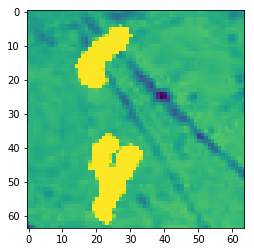

[ 4.]


In [10]:
def show_img(img):
    plt.close()
    plt.imshow(np.uint8(img))
    plt.show()

x_train_reshaped = x_train.reshape(-1, 64, 64)
y_train_reshaped = y_train.reshape(-1, 1) 
x_test_reshaped = x_test.reshape(-1, 64, 64)
# scipy.misc.imshow(x_train_reshaped[0])
show_img(x_train_reshaped[0])
print(y_train_reshaped[0])

## Split training data into train / valid sets

In [6]:
from sklearn.model_selection import train_test_split
x_train_s, x_valid_s, y_train_s, y_valid_s = train_test_split(x_train, y_train_one_hot, train_size=0.8, test_size=0.2)
data = {
    "x_train": x_train_s,
    "x_valid": x_valid_s,
    "y_train": y_train_s,
    "y_valid": y_valid_s
}

In [10]:
# data["y_train"] = data["y_train"].astype(int)
# data["y_valid"] = data["y_valid"].astype(int)
# data["y_train"] = data["y_train"].T
# data["y_valid"] = data["y_valid"].T
print(data["x_train"].shape)

(40000, 4096)


# Baseline Linear Classifier: Linear SVM

In [4]:
from sklearn import metrics
from sklearn.svm import LinearSVC

(40000, 4096)

In [10]:
def baseline_linear_svm(data):
    """
    Using out-of-the-box linear SVM to classify data
    """
    clf = LinearSVC()
    
    y_pred = clf.fit(data["x_train"], data["y_train"]).predict(data["x_valid"])
    print(y_pred)
    return metrics.accuracy_score(data["y_valid"], y_pred, average="macro"), y_pred
    
# score, y_pred = baseline_linear_svm(data)
# print(score)

0.0988


# Neural Network

In [118]:
def sigmoid(x):
    """
    sigmoid function
    """
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    """
    derivative of sigmoid
    """
    return x * (1. - x)

def tanh(x):
    """
    tanh function
    """
    return np.tanh(x)

def d_tanh(x):
    """
    derivative of tanh
    """
    return 1 - x*x

def relu(x):
    """
    relu function
    """
    return np.log(1 + np.exp(x))

def d_relu(x):
    """
    derivative of relu
    """
    return np.exp(x) / 1. + np.exp(x)

def softmax(x):
    """
    softmax classifier
    40k x 10
    """
    e = np.exp(x)
    e_sum = np.sum(e, axis=1)
    y = []
    for i in range(len(e)):
        y.append(e[i]/e_sum[i])
    return np.array(y)

def d_softmax(output, y):
    """
    d loss / d output
    """
    return output - y

def log_loss(output):
    loss = []
    for i in range(len(output)):
        log_loss_sum = []
        for j in range(10):
            log_loss_sum.append(np.log(output[i][j]))
        loss.append(log_loss_sum)
    return np.array(loss)
        


In [48]:
# # set number of hidden nodes
# num_hidden_nodes = 200
# num_input = 40000
# input_size = 4096

# # initialize random wh, bh, wo, and bo
# wh = np.random.uniform(size=(input_size,num_hidden_nodes))
# bh = np.random.uniform(size=(1, num_hidden_nodes))
# wo = np.random.uniform(size=(num_hidden_nodes, 10))
# bo = np.random.uniform(size=(1, 10))

# print(wh.shape, bh.shape, wo.shape, bo.shape)

(4096, 200) (1, 200) (200, 10) (1, 10)


In [111]:
# hidden_layer_input = np.dot(data["x_train"], wh) + bh
# hidden_layer_output = sigmoid(hidden_layer_input)
# output_layer_input = np.dot(hidden_layer_output, wo) + bo
# output_layer_output = softmax(output_layer_input)
# error_output = log_loss(output_layer_output, data["y_train"])

# print(hidden_layer_input.shape, hidden_layer_output.shape, output_layer_input.shape, output_layer_output.shape, error_output.shape)
# print(error_output)

(40000, 200) (40000, 200) (40000, 10) (40000, 10) (40000, 10)
[[ -0.00000000e+00  -4.87467870e-06  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -2.62087981e+01
   -0.00000000e+00  -0.00000000e+00]
 ..., 
 [ -4.29758438e+02  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -4.29758438e+02  -0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]]


In [77]:
print(np.sum(output_layer_output[0]))
print(output_layer_output[:10])
print(data["y_train"][:10])
# print(data["y_train"][:10])

1.0
[[  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.58329379e-04   2.41881067e-11
    3.21738840e-05   9.94423466e-05]
 [  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.58329379e-04   2.41881067e-11
    3.21738840e-05   9.94423466e-05]
 [  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.58329379e-04   2.41881067e-11
    3.21738840e-05   9.94423466e-05]
 [  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.58329379e-04   2.41881067e-11
    3.21738840e-05   9.94423466e-05]
 [  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.58329379e-04   2.41881067e-11
    3.21738840e-05   9.94423466e-05]
 [  7.22104758e-01   1.21599898e-02   3.64926004e-05   5.16692207e-07
    2.34719011e-01   3.01892863e-02   6.5

In [113]:
learning_rate = -0.01

# d_loss_d_output = d_softmax(output_layer_output, data["y_train"])
# d_loss_d_wo = np.dot(d_loss_d_output.T,  hidden_layer_output)

# d_loss_d_hidden_output = np.dot(wo, d_loss_d_output.T)

# print(d_loss_d_output.shape, d_loss_d_wo.shape, d_loss_d_hidden_output.shape)


# slope_output_layer = d_softmax(output_layer_output, data["y_train"])
# slope_hidden_layer = d_sigmoid(hidden_layer_output)
# d_output =  slope_output_layer * error_output * learning_rate

# error_hidden = np.dot(d_output, wo.T)
# d_hidden = error_hidden * slope_hidden_layer

# wo = wo + np.dot(hidden_layer_output.T, d_output) * learning_rate
# wh = wh + np.dot(data["x_train"].T, d_hidden) * learning_rate
# bo = bo + np.sum(d_output, axis=0) * learning_rate
# bh = bh + np.sum(d_hidden, axis=0) * learning_rate

In [ ]:
class Layer:
    def __init__(self, input_rows, input_cols, learning_rate=0.01, num_nodes=200, activation_func="sigmoid"):
        self.input_rows = input_rows
        self.input_cols = input_cols
        self.num_nodes = num_nodes
        self.next = None
        self.prev = None
        self.w = np.random.uniform(size=(self.input_cols,num_nodes))
        self.learning_rate = learning_rate
        
        if activation_func == "sigmoid":
            self.activation_func = self.sigmoid
            self.d_activation_func = self.d_sigmoid
            
        else:
            pass
        
    def feedforward(self, x):
        """
        return the predictions (represented by a probability)
        """
        # calculate stuff
        before_activation = np.dot(x, w)
        self.output = self.activation_func(before_activation) 
        self.derivative = self.d_activation_func(before_activation)
        
        
        # if there's a next layer
        if self.next:
            # add bias to the end of each row of self.output
            for i in range(self.input_rows):
                self.output[i] = self.output[i].append(1)
            
            # call next layer's feedforward step
            self.next.feedforward(self.output)

        
    def backprop(self, prev_deltas):
        """
        compute derivatives and adjust w
        """
        
        deltas = np.dot(self.derivative, prev_deltas)
        self.prev.backprop(np.dot(self.w, deltas))
        self.w = self.w - self.learning_rate * np.dot(self.output, deltas)
    
        
    def sigmoid(self, x):
        """
        sigmoid function
        """
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        """
        derivative of sigmoid
        """
        return x * (1. - x)
    
class OutputLayer(Layer):
    def __init__(self, input_rows, input_cols, learning_rate=0.01, num_nodes=200, activation_func="softmax", error_func="squared_error"):
        self.input_rows = input_rows
        self.input_cols = input_cols
        self.num_nodes = num_nodes
        self.next = None
        self.prev = None
        self.w = np.random.uniform(size=(self.input_cols,num_nodes))
        self.learning_rate = learning_rate
        
        if activation_func == "softmax":
            self.activation_func = self.softmax
            self.backprop_func = lambda x, traget: x - target
            
        elif activation_func == "sigmoid":
            self.activation_func = self.sigmoid
            self.backprop_func = lambda x, target: self.d_sigmoid(x) * (x - target)
            
        else:
            pass
        
    def backprop(self, targets):
        deltas = self.backprop_func(self.output, targets)
        self.prev.backprop(np.dot(self.w, deltas))
        self.w = self.w - self.learning_rate * np.dot(self.output, deltas)
    
    def softmax(self, x):
        e = np.exp(x)
        e_sum = np.sum(e, axis=1)
        y = []
        for i in range(len(e)):
            y.append(e[i]/e_sum[i])
        return np.array(y)
        
    
class NeuralNet:
    def __init__(self, learning_rate, num_epochs):
        self.first = None
        self.last = None
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def add_layer(self, layer):
        """
        Add layer to the end
        """
        if not self.first:
            self.first = layer
            self.last = layer
            
        else:
            temp = self.last
            temp.next = layer
            layer.prev = temp
            self.last = layer
            
    def fit(self, x_train, y_train):
        x_input = []
        # add bias to x
        for i in range(len(x_train)):
            x_input.append(x[i].append(1))
            
        for i in range(self.num_epochs):
            self.first.feedforward(x_input)
            self.last.backprop(y_train)



        
        
        
        

In [119]:
def train_mlp(data):
    # set number of hidden nodes
    num_hidden_nodes = 200
    num_input = 40000
    input_size = 4096
    learning_rate = 0.001
    num_epoch = 51

    # initialize random wh, bh, wo, and bo
    wh = np.random.uniform(size=(input_size,num_hidden_nodes))
    bh = np.random.uniform(size=(1, num_hidden_nodes))
    wo = np.random.uniform(size=(num_hidden_nodes, 10))
    bo = np.random.uniform(size=(1, 10))

    
    for i in range(num_epoch):
        hidden_layer_input = np.dot(data["x_train"], wh) + bh
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, wo) + bo
        output_layer_output = softmax(output_layer_input)
        error_output = log_loss(output_layer_output)
        
        if i % 10 == 0:
            print("error at i =", i,  np.sum(error_output))
            print(output_layer_input[:3])
            print(output_layer_output[:3])
#             print(wo[0], wh[0], bo[0], bh[0])


        slope_output_layer = d_softmax(output_layer_output, data["y_train"])
        slope_hidden_layer = d_sigmoid(hidden_layer_output)
        d_output = error_output * slope_output_layer * learning_rate

        error_hidden = np.dot(d_output, wo.T)
        d_hidden = error_hidden * slope_hidden_layer

        wo = wo + np.dot(hidden_layer_output.T, d_output) * learning_rate
        wh = wh + np.dot(data["x_train"].T, d_hidden) * learning_rate
        bo = bo + np.sum(d_output, axis=0) * learning_rate
        bh = bh + np.sum(d_hidden, axis=0) * learning_rate
        
    model = {"wh": wh, "bh": bh, "wo": wo, "bo": bo}
        
    return model

model = train_mlp(data)

# def predict(x, model, y):
#     hidden_input = np.dot(x, model["wh"]) + model["bh"]
#     hidden_output = sigmoid(hidden_input)
#     outer_input = np.dot(hidden_output, model['wo']) + model['bo']
#     outer_ouput = sigmoid(outer_input)
    
    
    



error at i = 0 -5440394.06185
[[  94.40669398  104.89006279   90.80468338  106.35614204   95.30846331
   113.42472528   99.04346378   98.6508905    96.01620947   99.3465586 ]
 [  94.40669398  104.89006279   90.80468338  106.35614204   95.30846331
   113.42472528   99.04346378   98.6508905    96.01620947   99.3465586 ]
 [  94.40669398  104.89006279   90.80468338  106.35614204   95.30846331
   113.42472528   99.04346378   98.6508905    96.01620947   99.3465586 ]]
[[  5.49690578e-09   1.96330386e-04   1.49894247e-10   8.50545684e-04
    1.35441495e-08   9.98951359e-01   5.67337947e-07   3.83132879e-07
    2.74866612e-08   7.68199888e-07]
 [  5.49690578e-09   1.96330386e-04   1.49894247e-10   8.50545684e-04
    1.35441495e-08   9.98951359e-01   5.67337947e-07   3.83132879e-07
    2.74866612e-08   7.68199888e-07]
 [  5.49690578e-09   1.96330386e-04   1.49894247e-10   8.50545684e-04
    1.35441495e-08   9.98951359e-01   5.67337947e-07   3.83132879e-07
    2.74866612e-08   7.68199888e-07]]
er